# **First Part: Graph Mining - Concepts and properties**

!pip install networkx==2.5 
!pip install matplotlib==3.2.2 
!pip install pandas==1.1.3 
!pip install scipy==1.6.2 

In [1]:
import networkx as nx
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

default_edge_color = 'gray'
default_node_color = '#407cc9'
enhanced_node_color = '#f5b042'
enhanced_edge_color = '#cc2f04'

## Graph properties
Graph properties provide quantitative measures that characterize the structure and functionality of a network. They describe how nodes and edges are arranged and how information, influence, or resources can propagate through the system. These properties are typically grouped into four major categories—integration, segregation, centrality, and resilience metrics—each offering a distinct perspective on the network’s organization and behavior.


### a) Integration metrics (یکپارچگی)
Integration metrics capture the overall connectedness of a network and evaluate how efficiently nodes can reach one another. They are primarily concerned with the ease of communication or flow across the entire system and reflect the network’s capacity to integrate information globally.

Distance, path, and shortest path

Characteristic path length

Global and local efficiency

###  b) Segregation metrics(تفکیک پذیری)
Segregation metrics describe the extent to which nodes form cohesive subgroups or modules within the network. They assess the degree of local clustering and reveal the presence of community structures that may correspond to specialized functions or localized interactions.

Clustering coefficient

Transitivity

Modularity

### c) Centrality metrics (مرکزیت)
Centrality metrics identify the most influential or structurally significant nodes in a network. They provide insight into which nodes play key roles in maintaining connectivity, facilitating information transfer, or controlling the flow of interactions across the system.

Degree centrality

Closeness centrality

Betweenness centrality

### d) Resilience metrics (پایداری/تاب آوری)
Resilience metrics assess the robustness of a network—its ability to maintain performance and structural integrity when subjected to failures, perturbations, or targeted attacks. These measures capture how networks adapt or degrade under adverse conditions, providing a quantitative understanding of stability and fault tolerance. Adverse conditions refer to situations such as node or edge failures, random noise, targeted attacks, or excessive load that can weaken the network’s connectivity and efficiency.

Assortativity coefficient

Network robustness indicators (e.g., size of the largest connected component, post-failure efficiency)

Redundancy or fault-tolerance measures

## Investigating some of these properties


**distance**: The concept of distance in a graph is often related to the number of edges to traverse in 
order to reach a target node from a given source node. 

**path**: The set of edges connecting node to node is called a path.

**shortest path**: A shortest path between a source node and a target node is the path having the lowest number of edges compared 
to all the possible paths between $i$ and $j$ . 

**diameter**: The diameter of a network is the number of edges contained in the longest shortest path among all possible shortest paths.

In [ ]:
# draw a simple graph
def draw_graph(G, node_names={}, filename=None, node_size=50):
    pos_nodes = nx.spring_layout(G)
    nx.draw(G, pos_nodes, with_labels=False, node_size=node_size, edge_color='gray')
    
    pos_attrs = {}
    for node, coords in pos_nodes.items():
        pos_attrs[node] = (coords[0], coords[1] + 0.08)
        
    nx.draw_networkx_labels(G, pos_attrs, labels=node_names, font_family='serif')
    
    plt.axis('off')
    axis = plt.gca()
    axis.set_xlim([1.2*x for x in axis.get_xlim()])
    axis.set_ylim([1.2*y for y in axis.get_ylim()])
    
    if filename:
        plt.savefig(filename, format="png")


# draw enhanced path on the graph
def draw_enhanced_path(G, path_to_enhance, node_names={}, filename=None):
    path_edges = list(zip(path,path[1:]))
    pos_nodes = nx.spring_layout(G)

    plt.figure(figsize=(5,5),dpi=300)
    pos_nodes = nx.spring_layout(G)
    nx.draw(G, pos_nodes, with_labels=False, node_size=50, edge_color='gray')
    
    pos_attrs = {}
    for node, coords in pos_nodes.items():
        pos_attrs[node] = (coords[0], coords[1] + 0.08)
        
    node_labels = {node: f"{node}:{node_names.get(node, '')}" for node in G.nodes()}
    nx.draw_networkx_labels(G, pos_attrs, labels=node_labels, font_family='serif')
    nx.draw_networkx_edges(G,pos_nodes,edgelist=path_edges, edge_color='#cc2f04', style='dashed', width=2.0)
    
    plt.axis('off')
    axis = plt.gca()
    axis.set_xlim([1.2*x for x in axis.get_xlim()])
    axis.set_ylim([1.2*y for y in axis.get_ylim()])
    
    if filename:
        plt.savefig(filename, format="png")

### Shortest path




### Example: 
There are different paths to reach Tokyo from Dublin. However, one of them is the shortest (the edges on the shortest path are 
highlighted):

In [ ]:
G = nx.Graph()
nodes = {1:'Dublin',2:'Paris',3:'Milan',4:'Rome',5:'Naples',6:'Moscow',7:'Tokyo'}
G.add_nodes_from(nodes.keys())
G.add_edges_from([(1,2),(1,3),(2,3),(3,4),(4,5),(5,6),(6,7),(7,5)])


path = nx.shortest_path(G,source=1,target=7)
print(path)

[1, 3, 4, 5, 7]


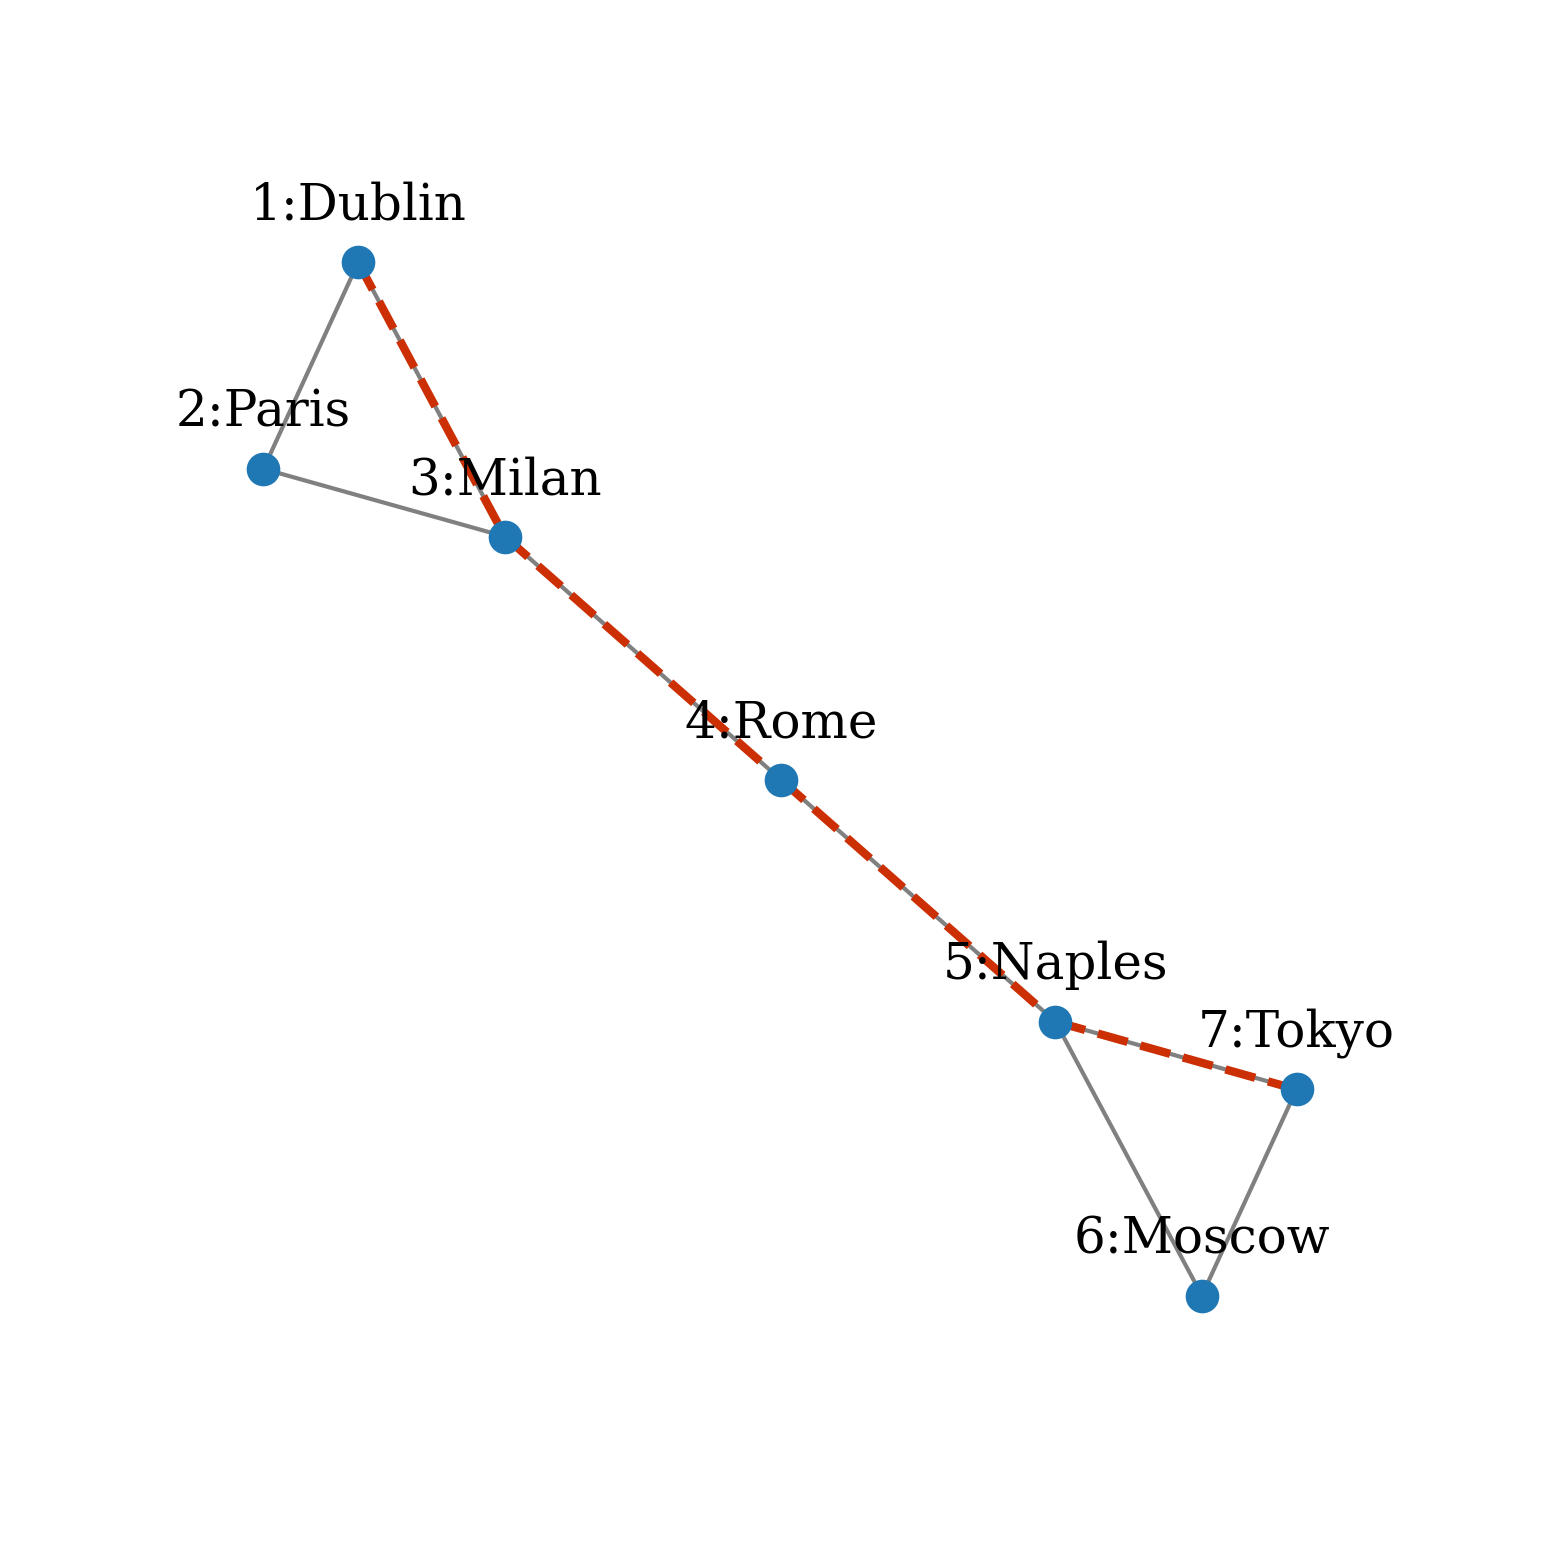

In [31]:
draw_enhanced_path(G, path, node_names=nodes,filename='shortest_path.png')

Shortest path: [1, 3, 4, 5, 7]
Total weight: 11725


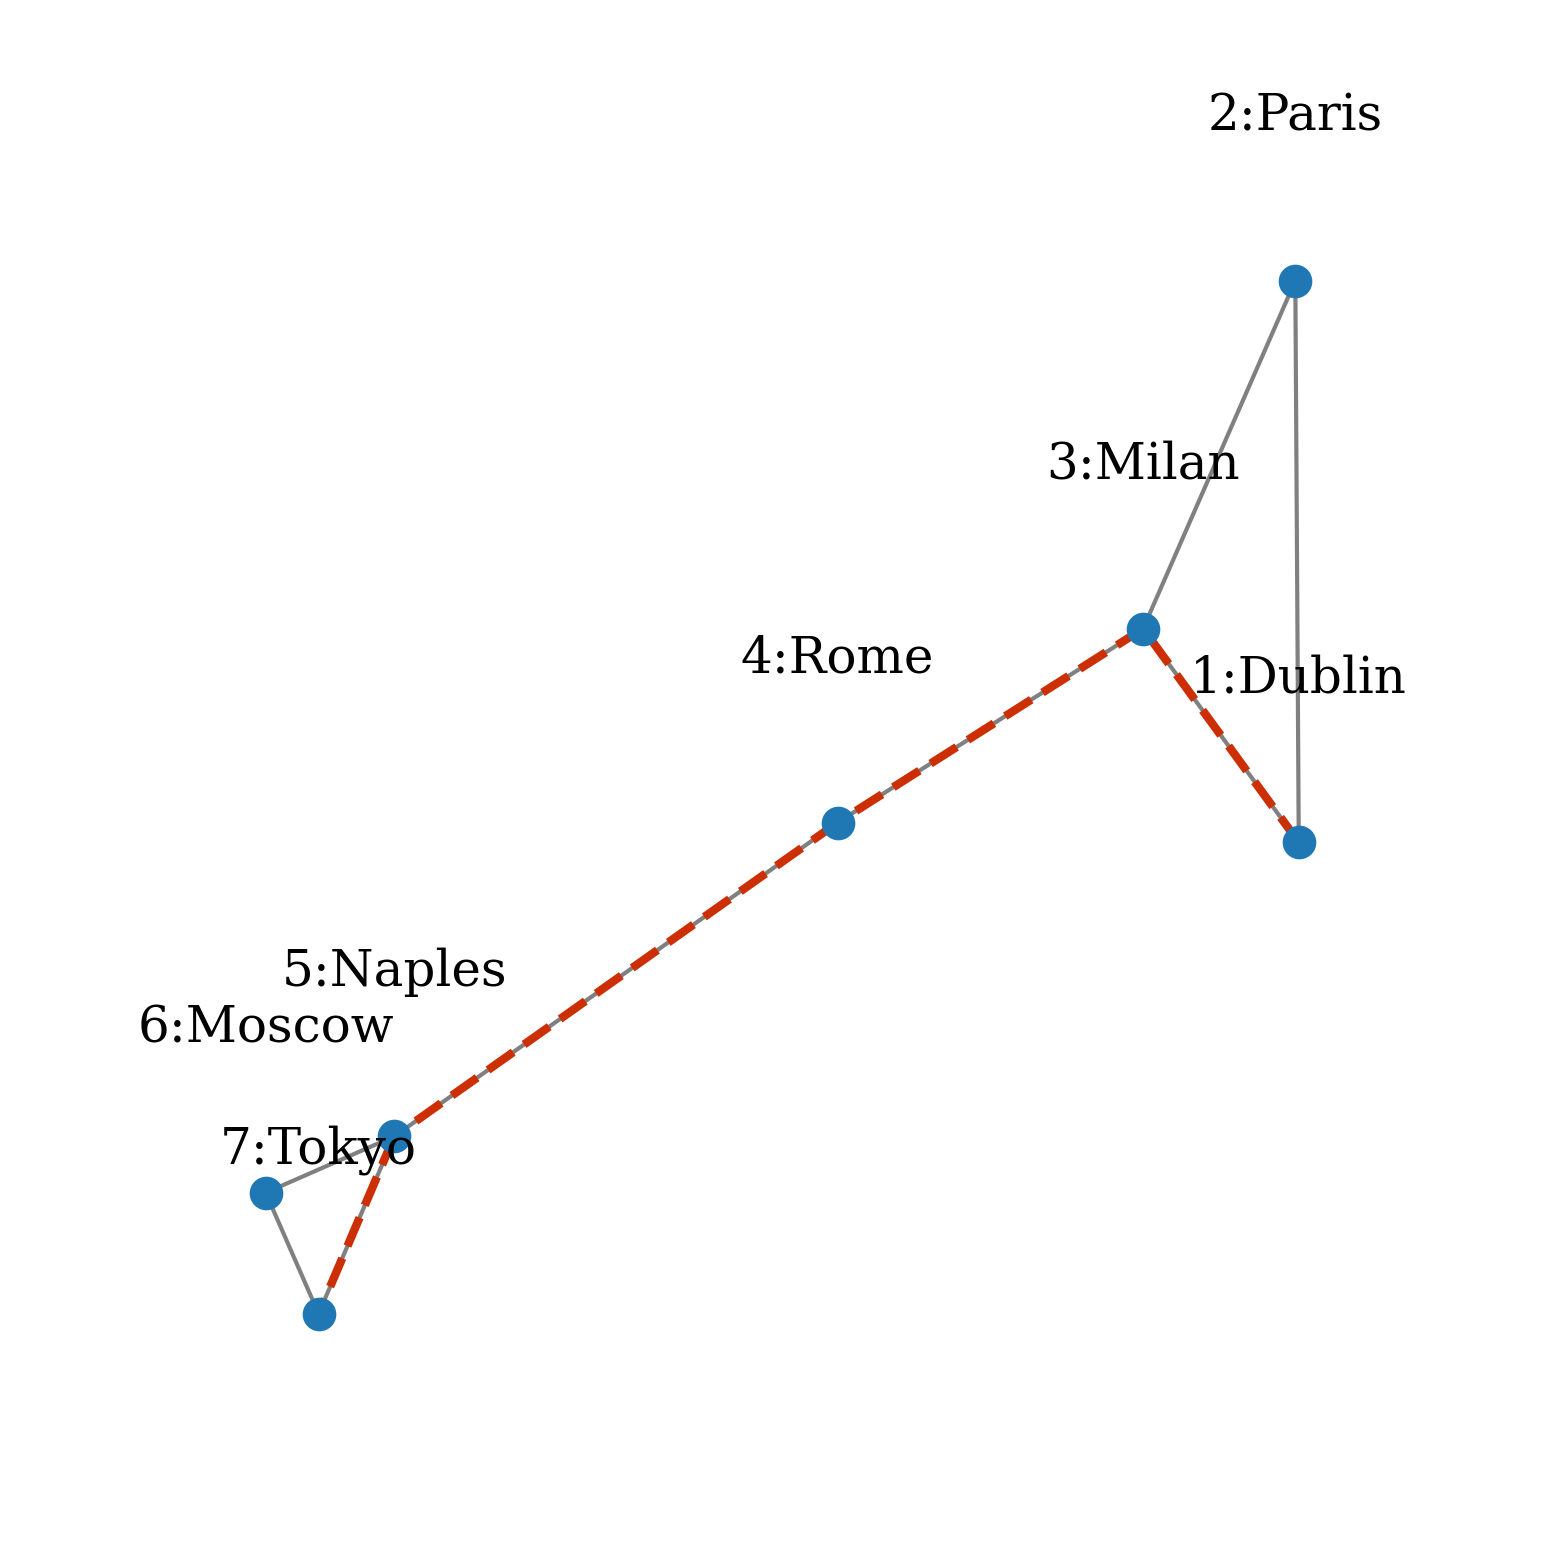

In [ ]:
import networkx as nx


G = nx.Graph()
nodes = {1:'Dublin',2:'Paris',3:'Milan',4:'Rome',5:'Naples',6:'Moscow',7:'Tokyo'}
G.add_nodes_from(nodes.keys())

# weighted Graph
edges = [
    (1,2,700),   # Dublin-Paris
    (1,3,1200),  # Dublin-Milan
    (2,3,1100),  # Paris-Milan
    (3,4,600),   # Milan-Rome
    (4,5,225),   # Rome-Naples
    (5,6,2500),  # Naples-Moscow
    (6,7,7400),  # Moscow-Tokyo
    (5,7,9700)   # Naples-Tokyo
]
G.add_weighted_edges_from(edges)

# shortest path (Dijkstera)
path = nx.shortest_path(G, source=1, target=7, weight='weight')
print("Shortest path:", path)

# sum of weights
length = nx.shortest_path_length(G, source=1, target=7, weight='weight')
print("Total weight:", length)

draw_enhanced_path(G, path, node_names=nodes,filename='shortest_path_weightedGraph.png')

### Characteristic path lenght

The characteristic path length is defined as the **average of all the shortest path lengths 
between all possible pair of nodes**. If $l_i$ is the average path length between the node $i$ and 
all the other nodes, the characteristic path length is computed as follows:

$$\displaystyle \frac{1}{q(q-1)} \sum_{i \in V} l_i$$

Here, $V$ is the set of nodes in the graph and $q=|V|$ represents its order. 

This is one of the most commonly used measures of how efficiently information is spread across a network. 

Networks having shorter characteristic path lengths promote the quick transfer of information and reduce costs.


In [34]:
nx.average_shortest_path_length(G)

2.1904761904761907

### Efficiency

**Global efficiency** is the average of the inverse shortest path length for all pairs of nodes.  
It provides a measure of how efficiently information can be exchanged across the network.  

Let $l_{ij}$ denote the shortest path length between node \(i\) and node \(j\).  
The global efficiency of a network with \(q\) nodes is defined as:

$$
E_{glob} = \frac{1}{q(q-1)} \sum_{\substack{i,j \in V\\ i \neq j}} \frac{1}{l_{ij}}
$$

> ⚠️ **Note:** For **undirected networks**, the correct normalization factor is $\frac{2}{q(q-1)}$, because each pair \((i,j)\) is counted only once.  

<span style="color:blue"> Global efficiency reaches its maximum when the network is fully connected, and is minimal for completely disconnected networks. </span>Intuitively, **shorter paths increase efficiency**.  

Global efficiency reflects how quickly or directly information can be transmitted across the entire network.  
Unlike the Characteristic Path Length, which emphasizes distances, **global efficiency** highlights the **speed and effectiveness of information transfer**.  

The **local efficiency** of a node can be computed by considering only the subgraph formed by its neighbors, without including the node itself.  
This measure reflects how well information is exchanged **within the immediate neighborhood** of the node.


In [38]:
G = nx.Graph()
nodes = {1:'Dublin',2:'Paris',3:'Milan',4:'Rome',5:'Naples',6:'Moscow',7:'Tokyo'}
G.add_nodes_from(nodes.keys())
G.add_edges_from([(1,2),(1,3),(2,3),(3,4),(4,5),(5,6),(6,7),(7,5)])

print("Global efficiency:",nx.global_efficiency(G))
print("Local efficiency:",nx.local_efficiency(G))

Global efficiency: 0.611111111111111
Local efficiency: 0.6666666666666667


### Another example
In the following, two examples of graphs are depicted. As observed, a fully 
connected graph on the left presents a higher level of efficiency compared to a circular 
graph on the right. 

In a fully connected graph, each node can be reached from any other 
node in the graph, and information is exchanged rapidly across the network. However, 
in a circular graph, several nodes should instead be traversed to reach the target node, 
making it less efficient:

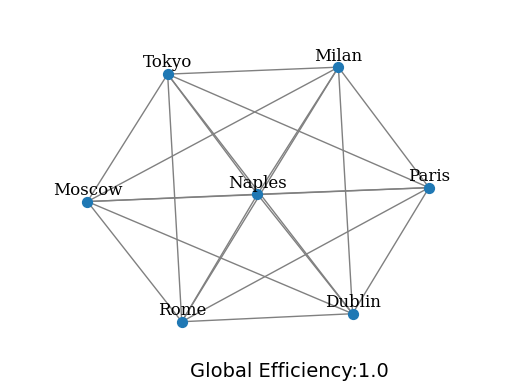

In [8]:
# higher efficiency
G = nx.complete_graph(n=7)
nodes = {0:'Dublin',1:'Paris',2:'Milan',3:'Rome',4:'Naples',5:'Moscow',6:'Tokyo'}

ge = round(nx.global_efficiency(G),2)

# place the text box in axes coords
ax = plt.gca()
ax.text(-.4, -1.3, "Global Efficiency:{}".format(ge), fontsize=14, ha='left', va='bottom');

draw_graph(G,node_names=nodes,filename='efficiency.png')

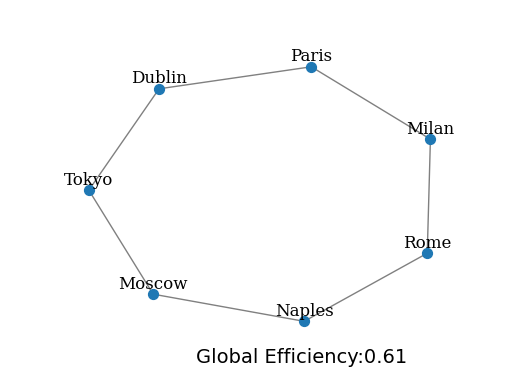

In [9]:
# lower efficiency
G = nx.cycle_graph(n=7)
nodes = {0:'Dublin',1:'Paris',2:'Milan',3:'Rome',4:'Naples',5:'Moscow',6:'Tokyo'}

le = round(nx.global_efficiency(G),2)

# place the text box in axes coords
ax = plt.gca()
ax.text(-.4, -1.3, "Global Efficiency:{}".format(le), fontsize=14, ha='left', va='bottom');

draw_graph(G, node_names=nodes,filename='less_efficiency.png')

### Clustering Coefficient

The **clustering coefficient** quantifies the tendency of nodes to form tightly connected groups within a network. It captures the extent to which a node’s neighbors are also connected to each other, reflecting the presence of local cohesiveness or triangular relationships.

For a **single node $v$**, the clustering coefficient is defined as the fraction of possible triangles through that node that actually exist:

$$
C_v = \frac{\text{Number of triangles involving } v}{\frac{k_v (k_v - 1)}{2}}
$$

where $k_v$ is the degree of node $v$, and the denominator represents the maximum number of possible edges between its neighbors.  

For the **entire graph**, the **global clustering coefficient** is often computed as the average over all nodes:

$$
C_{\text{global}} = \frac{1}{|V|} \sum_{v \in V} C_v
$$

where $|V|$ is the total number of nodes in the network.

**Interpretation:**

- $C_v = 1$: All neighbors of node $v$ are fully connected, forming a complete clique.  
- $C_v = 0$: No connections exist among the neighbors of $v$.  
- $0 < C_v < 1$: Partial clustering exists among the neighbors.

The clustering coefficient is a fundamental measure in network analysis, providing insights into the local cohesiveness and modular organization of networks. High clustering is often indicative of community structures or functional groupings in real-world networks.


In [42]:
G = nx.Graph()
nodes = {1:'Dublin',2:'Paris',3:'Milan',4:'Rome',5:'Naples',6:'Moscow',7:'Tokyo'}
G.add_nodes_from(nodes.keys())
G.add_edges_from([(1,2),(1,3),(2,3),(3,4),(4,5),(5,6),(6,7),(7,5)])

In [41]:
nx.average_clustering(G)

0.6666666666666667

The **local clustering coefficient** is computed in networkx using the following command. The output is a Python dictionary containing, for each node (identified by the respective 
key), the corresponding value

In [12]:
nx.clustering(G)

{1: 1.0,
 2: 1.0,
 3: 0.3333333333333333,
 4: 0,
 5: 0.3333333333333333,
 6: 1.0,
 7: 1.0}

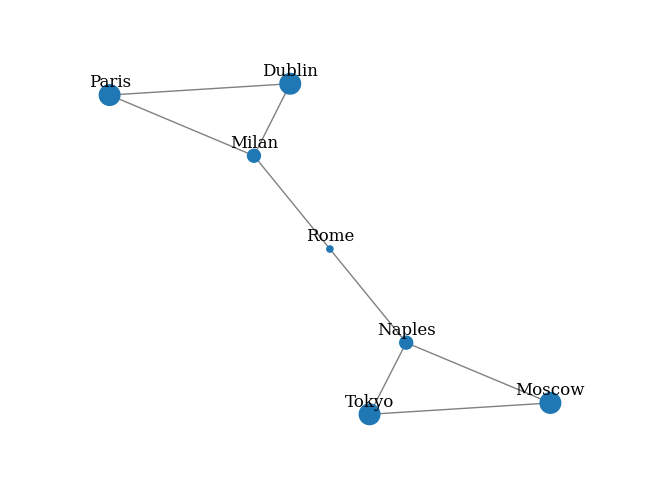

In [13]:
cc = nx.clustering(G)
node_size=[(v + 0.1) * 200 for v in cc.values()]
draw_graph(G, node_names=nodes, node_size=node_size,filename='clustering.png')

**Transitivity**  
  Transitivity is a global measure of clustering in the network. It quantifies the overall probability that two neighbors of a node are also neighbors of each other. Formally, it is defined as:

  $$
  T = \frac{3 \times \text{Number of triangles in the network}}{\text{Number of connected triples of nodes}}
  $$

  where a **connected triple** is a single node with edges to an unordered pair of other nodes.  
  **Interpretation:**  
  - $T = 1$: All possible triangles exist; the network is highly clustered.  
  - $T = 0$: No triangles; no clustering in the network.



**Example**: Consider a small network with 4 nodes and the following edges:

```
1 --- 2
|  /
3
|
4
```
- **Edges:** (1,2), (1,3), (2,3), (3,4)  
- Nodes 1, 2, and 3 form a triangle. Node 4 is connected only to node 3.


#### Step 1: Count triangles

A **triangle** is a set of three nodes where each node is connected to the other two.  

- Nodes 1, 2, and 3 form **1 triangle**.  

$$
\text{Number of triangles} = 1
$$



#### Step 2: Count connected triples

A **connected triple** is a node with edges to an unordered pair of other nodes.  

- Node 1: neighbors = {2,3} → 1 triple: (2,1,3)  
- Node 2: neighbors = {1,3} → 1 triple: (1,2,3)  
- Node 3: neighbors = {1,2,4} → 3 triples: (1,3,2), (1,3,4), (2,3,4)  
- Node 4: neighbors = {3} → 0 triples  

**Total connected triples = 1 + 1 + 3 + 0 = 5**



#### Step 3: Compute Transitivity

$$
T = \frac{3 \times \text{Number of triangles}}{\text{Number of connected triples}} = \frac{3 \times 1}{5} = 0.6
$$

**Interpretation:** There is a 60% probability that two neighbors of a node are connected. 

In [51]:
G = nx.Graph()
nodes = {1:'Dublin',2:'Paris',3:'Milan',4:'Rome',5:'Naples',6:'Moscow',7:'Tokyo'}
G.add_nodes_from(nodes.keys())
G.add_edges_from([(1,2),(1,3),(2,3),(3,4),(4,5),(5,6),(6,7),(7,5)])
nx.transitivity(G)

0.5454545454545454



**Modularity**  
  Modularity quantifies the strength of division of a network into communities or modules. It compares the actual density of edges within communities to the expected density if edges were randomly distributed. Formally, for a given partition of nodes:

  $$
  Q = \frac{1}{2m} \sum_{i,j} \left[ A_{ij} - \frac{k_i k_j}{2m} \right] \delta(c_i, c_j)
  $$

  where:  
  - $A_{ij}$ is the adjacency matrix,  
  - $k_i$ and $k_j$ are the degrees of nodes $i$ and $j$,  
  - $m$ is the total number of edges in the network,  
  - $c_i$ is the community assignment of node $i$,  
  - $\delta(c_i, c_j) = 1$ if $i$ and $j$ are in the same community, 0 otherwise.  

  **Interpretation:**  
  - Higher $Q$ indicates stronger community structure.  
  - $Q \approx 0$ implies the partition is no better than random.

In [48]:
import networkx.algorithms.community as nx_comm

G = nx.Graph()
nodes = {1:'Dublin',2:'Paris',3:'Milan',4:'Rome',5:'Naples',6:'Moscow',7:'Tokyo'}
G.add_nodes_from(nodes.keys())
G.add_edges_from([(1,2),(1,3),(2,3),(3,4),(4,5),(5,6),(6,7),(7,5)])

# partitions can be provided manually
print(nx_comm.modularity(G, communities=[{1,2,3,4},{5,6,7}]))

# or automatically computed using networkx
print(nx_comm.modularity(G, nx_comm.label_propagation_communities(G)))

0.3671875
0.3671875


### Centrality
Segregation metrics help to understand the presence of groups. However, each node in a 
graph has its own importance. To quantify it, we can use centrality metrics.

One of the most common and simple centrality metrics is the **degree centrality** metric. 
This is directly connected with the degree of a node, measuring the number of incident
edges on a certain node $i$. 
Intuitively, the more a node is connected to an other node, the more its degree centrality 
will assume high values. Note that, if a graph is directed, the **in-degree centrality** and 
**out-degree centrality** will be considered for each node, related to the number of incoming
and outcoming edges, respectively. Degree centrality is computed in networkx by using 
the following command:

In [14]:
G = nx.Graph()
nodes = {1:'Dublin',2:'Paris',3:'Milan',4:'Rome',5:'Naples',6:'Moscow',7:'Tokyo'}
G.add_nodes_from(nodes.keys())
G.add_edges_from([(1,2),(1,3),(2,3),(3,4),(4,5),(5,6),(6,7),(7,5)])

In [15]:
nx.degree_centrality(G)

{1: 0.3333333333333333,
 2: 0.3333333333333333,
 3: 0.5,
 4: 0.3333333333333333,
 5: 0.5,
 6: 0.3333333333333333,
 7: 0.3333333333333333}

,Dublin,Paris,Milan,Rome,Naples,Moscow,Tokyo
Degree centrality,0.333333,0.333333,0.5,0.333333,0.5,0.333333,0.333333


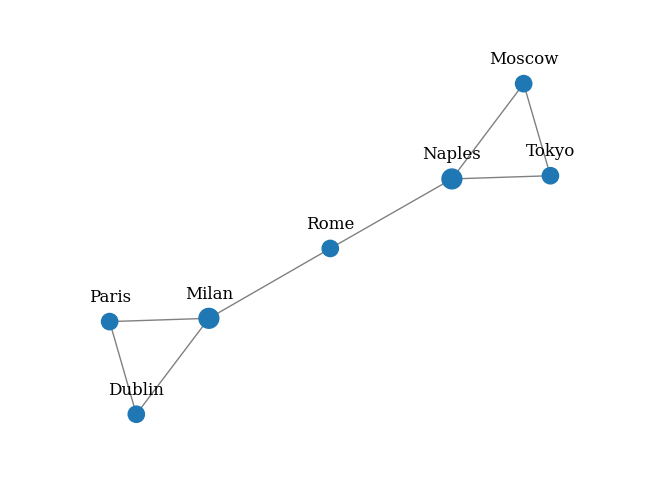

In [16]:
dc = nx.degree_centrality(G)
node_size=[(v + 0.01) * 400 for v in dc.values()]
draw_graph(G, node_names=nodes, node_size=node_size,filename='deg_centr.png')

df = pd.DataFrame(dc,index=['Degree centrality'])
df.columns = nodes.values()
df

### Closeness Centrality

The **closeness centrality** metric quantifies how close or well-connected a node is to all other nodes in the network. Intuitively, a node with high closeness centrality can quickly interact with all other nodes, while a node with low closeness centrality is more distant from the rest of the network.

Formally, let $l_{ij}$ denote the shortest path distance between nodes $i$ and $j$. The closeness centrality of node $i$ is defined as:

$$
C_i = \frac{1}{\sum_{j \in V, j \ne i} l_{ij}}
$$

where $V$ is the set of all nodes in the network.

**Interpretation:**

- Higher $C_i$ indicates that node $i$ is, on average, **closer to all other nodes**, facilitating faster information flow.  
- Lower $C_i$ indicates that node $i$ is more **peripheral** in the network structure.


In [17]:
nx.closeness_centrality(G)

{1: 0.4,
 2: 0.4,
 3: 0.5454545454545454,
 4: 0.6,
 5: 0.5454545454545454,
 6: 0.4,
 7: 0.4}

,Dublin,Paris,Milan,Rome,Naples,Moscow,Tokyo
Closeness centrality,0.4,0.4,0.545455,0.6,0.545455,0.4,0.4


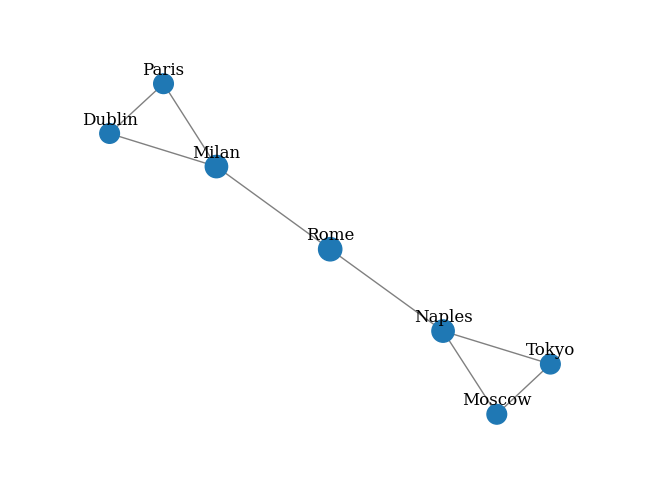

In [18]:
dc = nx.closeness_centrality(G)
node_size=[(v + 0.1) * 400 for v in dc.values()]
draw_graph(G, node_names=nodes, node_size=node_size,filename='clos_centr.png')

df = pd.DataFrame(dc,index=['Closeness centrality'])
df.columns = nodes.values()
df

### Betweenness Centrality

The **betweenness centrality** metric measures the extent to which a node acts as a **bridge** or intermediary between other nodes in the network. A node may have few direct connections but still play a crucial role in maintaining network connectivity by lying on many shortest paths between other nodes.

Formally, let $L_{wj}$ be the total number of shortest paths between nodes $w$ and $j$, and let $L_{wj}(i)$ be the number of those paths that pass through node $i$. The betweenness centrality of node $i$ is defined as:

$$
C_B(i) = \sum_{\substack{w,j \in V \\ w \ne j \ne i}} \frac{L_{wj}(i)}{L_{wj}}
$$

where $V$ is the set of nodes in the network.

**Interpretation:**

- Higher $C_B(i)$ indicates that node $i$ frequently lies on shortest paths connecting other nodes, making it **structurally important** for communication and flow in the network.  
- Nodes with low betweenness centrality do not significantly control or mediate information flow between other nodes.


In [19]:
nx.betweenness_centrality(G)

{1: 0.0,
 2: 0.0,
 3: 0.5333333333333333,
 4: 0.6,
 5: 0.5333333333333333,
 6: 0.0,
 7: 0.0}

,Dublin,Paris,Milan,Rome,Naples,Moscow,Tokyo
Betweenness centrality,0.0,0.0,0.533333,0.6,0.533333,0.0,0.0


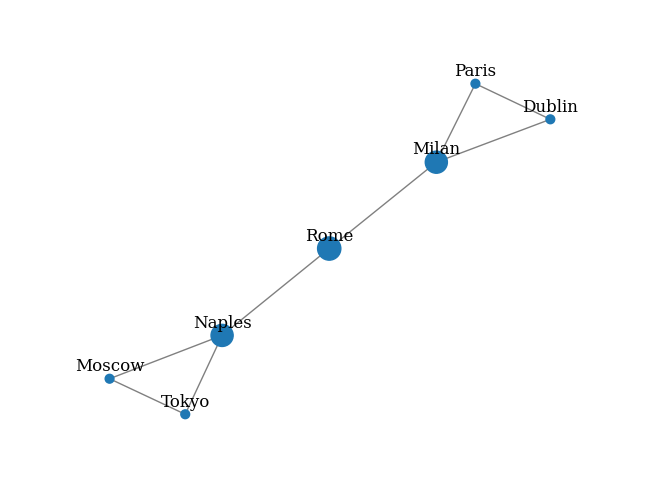

In [20]:
dc = nx.betweenness_centrality(G)
node_size=[(v + 0.1) * 400 for v in dc.values()]
draw_graph(G, node_names=nodes, node_size=node_size,filename='bet_centrality.png')

df = pd.DataFrame(dc,index=['Betweenness centrality'])
df.columns = nodes.values()
df

Milan and Naples have the highest degree centrality. 

Rome has the highest closeness centrality since it is the closest to any other node. 
It also shows the highest betweenness centrality because of its crucial role in connecting the two visible 
clusters and keeping the whole network connected. 

### Assortativity

Assortativity measures how likely it is that nodes in a network connect to other nodes that are similar to them. There are different ways to calculate this similarity, but one of the most common is using the Pearson correlation coefficient. This method looks at the degrees (number of connections) of two nodes that are directly connected by a link.

- If the Pearson coefficient is **positive**, it means that nodes tend to connect to others with a **similar degree** (e.g., high-degree nodes connecting to other high-degree nodes).

- If the coefficient is **negative**, it means that nodes tend to connect to others with a **different degree** (e.g., high-degree nodes connecting to low-degree nodes).

Assortativity using the Pearson  correlation coefficient is computed in networkx by using the following 
command:

In [21]:
nx.degree_pearson_correlation_coefficient(G)

-0.6

## Assortativity and Influencers in Social Networks
Most social networks are assortative—nodes with similar connectivity levels tend to connect with each other. Highly connected users often engage with other highly connected users, while those with fewer connections interact with similar peers.

However, influencers like celebrities or bloggers disrupt this pattern. They receive many connections from low-degree users while also forming dense links with other influencers.

This mixed pattern—many ties from low-degree to high-degree nodes, plus strong interconnections among high-degree nodes—introduces disassortativity into the network, reflecting the complex and hierarchical nature of real-world social systems.

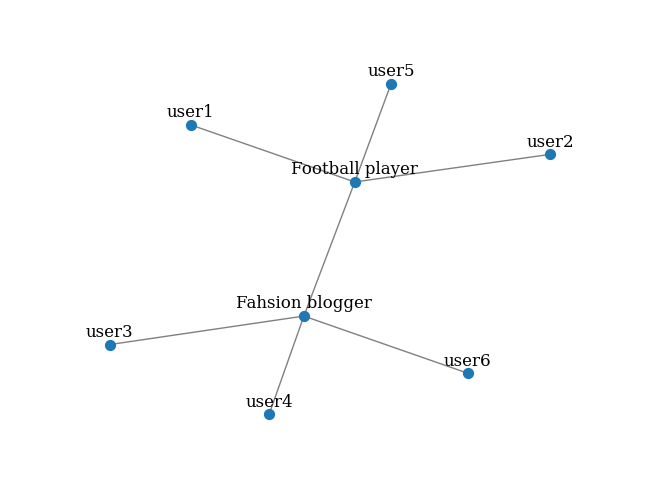

In [22]:
G = nx.Graph()
nodes = {1:'user1', 2:'user2', 3:'Football player', 4:'Fahsion blogger', 5:'user3', 6:'user4',
         7:'user5', 8:'user6'}
G.add_nodes_from(nodes.keys())
G.add_edges_from([(1,3),(2,3),(7,3),(3,4),(5,4),(6,4),(8,4)])

draw_graph(G, node_names=nodes,filename='assortativity.png')

In [23]:
nx.degree_pearson_correlation_coefficient(G)

-0.7499999999999998

-------------------------------

All implemented algorithms in networkx:

https://networkx.org/documentation/stable/reference/algorithms/
